# Tak Player Bot Project
## Experiments Results Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = "./experiments/results"

### Random Policy Results

In [118]:
df_random_eff_runs = pd.read_csv(f"{path}/random_eff_run_16.csv")
df_random_eff_runs

,board_size,starting_player,trial_number,steps,reward_for_white_player,reward_for_black_player
0,3,white,0,19,0,0
1,3,white,1,24,0,0
2,3,white,2,20,0,0
3,3,white,3,14,0,10
4,3,white,4,8,0,10
...,...,...,...,...,...,...
1795,5,black,295,37,0,26
1796,5,black,296,51,0,0
1797,5,black,297,81,0,26
1798,5,black,298,65,0,0


In [119]:
df_random_eff_runs_b3 = df_random_eff_runs[df_random_eff_runs["board_size"] == 3]
df_random_eff_runs_b3 = df_random_eff_runs_b3.drop("board_size", axis=1)
df_random_eff_runs_b3

,starting_player,trial_number,steps,reward_for_white_player,reward_for_black_player
0,white,0,19,0,0
1,white,1,24,0,0
2,white,2,20,0,0
3,white,3,14,0,10
4,white,4,8,0,10
...,...,...,...,...,...
595,black,295,26,0,0
596,black,296,23,0,10
597,black,297,14,0,0
598,black,298,27,0,0


In [120]:
df_random_eff_runs_b3_white = df_random_eff_runs_b3[df_random_eff_runs["starting_player"] == "white"]
df_random_eff_runs_b3_white = df_random_eff_runs_b3_white.drop("starting_player", axis=1)
df_random_eff_runs_b3_white

/var/folders/tv/5x2dppvx0q35zy5077krck6m0000gn/T/ipykernel_13952/3237180122.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_random_eff_runs_b3_white = df_random_eff_runs_b3[df_random_eff_runs["starting_player"] == "white"]


,trial_number,steps,reward_for_white_player,reward_for_black_player
0,0,19,0,0
1,1,24,0,0
2,2,20,0,0
3,3,14,0,10
4,4,8,0,10
...,...,...,...,...
295,295,12,0,10
296,296,11,10,0
297,297,15,0,0
298,298,11,10,0


In [121]:
df_random_eff_runs_b3_black = df_random_eff_runs_b3[df_random_eff_runs["starting_player"] == "black"]
df_random_eff_runs_b3_black = df_random_eff_runs_b3_black.drop("starting_player", axis=1)
df_random_eff_runs_b3_black

/var/folders/tv/5x2dppvx0q35zy5077krck6m0000gn/T/ipykernel_13952/4179872691.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_random_eff_runs_b3_black = df_random_eff_runs_b3[df_random_eff_runs["starting_player"] == "black"]


,trial_number,steps,reward_for_white_player,reward_for_black_player
300,0,22,0,0
301,1,14,0,0
302,2,26,10,0
303,3,11,0,10
304,4,14,0,0
...,...,...,...,...
595,295,26,0,0
596,296,23,0,10
597,297,14,0,0
598,298,27,0,0


In [122]:
df_random_eff_runs_b4 = df_random_eff_runs[df_random_eff_runs["board_size"] == 4]
df_random_eff_runs_b4 = df_random_eff_runs_b4.drop("board_size", axis=1)
df_random_eff_runs_b4

,starting_player,trial_number,steps,reward_for_white_player,reward_for_black_player
600,white,0,21,0,0
601,white,1,25,17,0
602,white,2,37,0,0
603,white,3,40,0,17
604,white,4,41,0,0
...,...,...,...,...,...
1195,black,295,33,0,17
1196,black,296,45,0,0
1197,black,297,57,0,17
1198,black,298,46,0,0


In [123]:
df_random_eff_runs_b4_white = df_random_eff_runs_b4[df_random_eff_runs["starting_player"] == "white"]
df_random_eff_runs_b4_white = df_random_eff_runs_b4_white.drop("starting_player", axis=1)
df_random_eff_runs_b4_white

/var/folders/tv/5x2dppvx0q35zy5077krck6m0000gn/T/ipykernel_13952/2832092955.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_random_eff_runs_b4_white = df_random_eff_runs_b4[df_random_eff_runs["starting_player"] == "white"]


,trial_number,steps,reward_for_white_player,reward_for_black_player
600,0,21,0,0
601,1,25,17,0
602,2,37,0,0
603,3,40,0,17
604,4,41,0,0
...,...,...,...,...
895,295,39,0,0
896,296,29,0,0
897,297,31,17,0
898,298,44,0,17


In [124]:
df_random_eff_runs_b4_black = df_random_eff_runs_b4[df_random_eff_runs["starting_player"] == "black"]
df_random_eff_runs_b4_black = df_random_eff_runs_b4_black.drop("starting_player", axis=1)
df_random_eff_runs_b4_black

/var/folders/tv/5x2dppvx0q35zy5077krck6m0000gn/T/ipykernel_13952/1210910269.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_random_eff_runs_b4_black = df_random_eff_runs_b4[df_random_eff_runs["starting_player"] == "black"]


,trial_number,steps,reward_for_white_player,reward_for_black_player
900,0,46,0,0
901,1,47,0,0
902,2,31,0,0
903,3,34,0,0
904,4,21,0,0
...,...,...,...,...
1195,295,33,0,17
1196,296,45,0,0
1197,297,57,0,17
1198,298,46,0,0


In [125]:
df_random_eff_runs_b5 = df_random_eff_runs[df_random_eff_runs["board_size"] == 5]
df_random_eff_runs_b5 = df_random_eff_runs_b5.drop("board_size", axis=1)
df_random_eff_runs_b5

,starting_player,trial_number,steps,reward_for_white_player,reward_for_black_player
1200,white,0,53,26,0
1201,white,1,60,0,26
1202,white,2,49,26,0
1203,white,3,43,26,0
1204,white,4,48,0,0
...,...,...,...,...,...
1795,black,295,37,0,26
1796,black,296,51,0,0
1797,black,297,81,0,26
1798,black,298,65,0,0


In [126]:
df_random_eff_runs_b5_white = df_random_eff_runs_b5[df_random_eff_runs["starting_player"] == "white"]
df_random_eff_runs_b5_white = df_random_eff_runs_b5_white.drop("starting_player", axis=1)
df_random_eff_runs_b5_white

/var/folders/tv/5x2dppvx0q35zy5077krck6m0000gn/T/ipykernel_13952/4263729703.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_random_eff_runs_b5_white = df_random_eff_runs_b5[df_random_eff_runs["starting_player"] == "white"]


,trial_number,steps,reward_for_white_player,reward_for_black_player
1200,0,53,26,0
1201,1,60,0,26
1202,2,49,26,0
1203,3,43,26,0
1204,4,48,0,0
...,...,...,...,...
1495,295,64,0,0
1496,296,59,0,0
1497,297,80,0,26
1498,298,66,0,0


In [127]:
df_random_eff_runs_b5_black = df_random_eff_runs_b5[df_random_eff_runs["starting_player"] == "black"]
df_random_eff_runs_b5_black = df_random_eff_runs_b5_black.drop("starting_player", axis=1)
df_random_eff_runs_b5_black

/var/folders/tv/5x2dppvx0q35zy5077krck6m0000gn/T/ipykernel_13952/2323754284.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_random_eff_runs_b5_black = df_random_eff_runs_b5[df_random_eff_runs["starting_player"] == "black"]


,trial_number,steps,reward_for_white_player,reward_for_black_player
1500,0,61,0,0
1501,1,49,0,26
1502,2,70,0,0
1503,3,63,0,26
1504,4,64,0,0
...,...,...,...,...
1795,295,37,0,26
1796,296,51,0,0
1797,297,81,0,26
1798,298,65,0,0


In [128]:
b3_white_wins_startW = sum(df_random_eff_runs_b3_white["reward_for_white_player"] > 0)
b3_black_wins_startW = sum(df_random_eff_runs_b3_white["reward_for_black_player"] > 0)
b3_ties_startW = 300 - b3_white_wins_startW - b3_black_wins_startW
b3_white_wins_startW, b3_black_wins_startW, b3_ties_startW

(66, 75, 159)

In [129]:
b3_white_wins_startB = sum(df_random_eff_runs_b3_black["reward_for_white_player"] > 0)
b3_black_wins_startB = sum(df_random_eff_runs_b3_black["reward_for_black_player"] > 0)
b3_ties_startB = 300 - b3_white_wins_startB - b3_black_wins_startB
b3_white_wins_startB, b3_black_wins_startB, b3_ties_startB

(67, 74, 159)

In [130]:
b4_white_wins_startW = sum(df_random_eff_runs_b4_white["reward_for_white_player"] > 0)
b4_black_wins_startW = sum(df_random_eff_runs_b4_white["reward_for_black_player"] > 0)
b4_ties_startW = 300 - b4_white_wins_startW - b4_black_wins_startW
b4_white_wins_startW, b4_black_wins_startW, b4_ties_startW

(73, 74, 153)

In [131]:
b4_white_wins_startB = sum(df_random_eff_runs_b4_black["reward_for_white_player"] > 0)
b4_black_wins_startB = sum(df_random_eff_runs_b4_black["reward_for_black_player"] > 0)
b4_ties_startB = 300 - b4_white_wins_startB - b4_black_wins_startB
b4_white_wins_startB, b4_black_wins_startB, b4_ties_startB

(68, 67, 165)

In [132]:
b5_white_wins_startW = sum(df_random_eff_runs_b5_white["reward_for_white_player"] > 0)
b5_black_wins_startW = sum(df_random_eff_runs_b5_white["reward_for_black_player"] > 0)
b5_ties_startW = 300 - b5_white_wins_startW - b5_black_wins_startW
b5_white_wins_startW, b5_black_wins_startW, b5_ties_startW

(64, 78, 158)

In [133]:
b5_white_wins_startB = sum(df_random_eff_runs_b5_black["reward_for_white_player"] > 0)
b5_black_wins_startB = sum(df_random_eff_runs_b5_black["reward_for_black_player"] > 0)
b5_ties_startB = 300 - b5_white_wins_startB - b5_black_wins_startB
b5_white_wins_startB, b5_black_wins_startB, b5_ties_startB

(73, 76, 151)

In [134]:
all_white_wins = np.array((
    b3_white_wins_startW, b3_white_wins_startB, 
    b4_white_wins_startW, b4_white_wins_startB, 
    b5_white_wins_startW, b5_white_wins_startB
))
all_black_wins = np.array((
    b3_black_wins_startW, b3_black_wins_startB,
    b4_black_wins_startW, b4_black_wins_startB,
    b5_black_wins_startW, b5_black_wins_startB
))
all_ties = np.array((
    b3_ties_startW, b3_ties_startB, 
    b4_ties_startW, b4_ties_startB,
    b5_ties_startW, b5_ties_startB
))

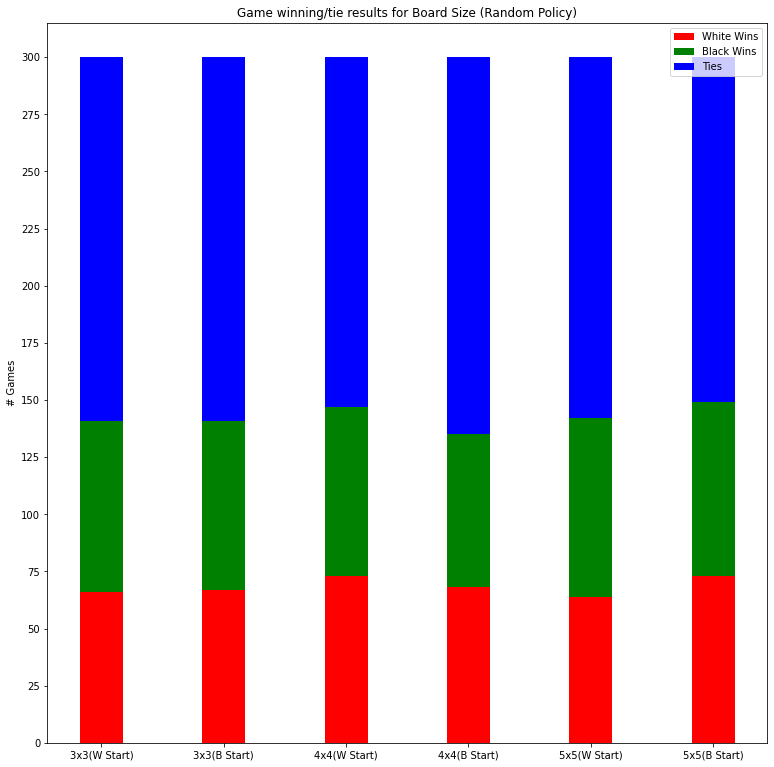

In [135]:
width = 0.35
ind = np.arange(6)
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, all_white_wins, width, color='r', label="White Wins")
ax.bar(ind, all_black_wins, width, bottom=all_white_wins, color='g', label="Black Wins")
ax.bar(ind, all_ties, width, bottom=all_white_wins+all_black_wins, color='b', label="Ties")
ax.set_ylabel('# Games')
ax.set_title('Game winning/tie results for Board Size (Random Policy)')
ax.set_xticks(ind)
ax.set_xticklabels(['3x3(W Start)', '3x3(B Start)', '4x4(W Start)', '4x4(B Start)', '5x5(W Start)', '5x5(B Start)'])
ax.set_yticks(np.arange(0, 325, 25))
ax.legend()
plt.savefig("plot_random_policy_game_results.png", bbox_inches='tight')
plt.show()

### Random Take Wins

In [136]:
df_random_eff_runs = pd.read_csv(f"{path}/random_eff_run_takewin_1.csv")
df_random_eff_runs

,board_size,starting_player,trial_number,steps,reward_for_white_player,reward_for_black_player
0,3,white,0,7,10,0
1,3,white,1,22,0,0
2,3,white,2,9,10,0
3,3,white,3,16,0,10
4,3,white,4,18,0,0
...,...,...,...,...,...,...
1795,5,black,295,104,0,0
1796,5,black,296,62,0,0
1797,5,black,297,64,0,0
1798,5,black,298,99,0,0


In [137]:
df_random_eff_runs_b3 = df_random_eff_runs[df_random_eff_runs["board_size"] == 3]
df_random_eff_runs_b3 = df_random_eff_runs_b3.drop("board_size", axis=1)
df_random_eff_runs_b3

,starting_player,trial_number,steps,reward_for_white_player,reward_for_black_player
0,white,0,7,10,0
1,white,1,22,0,0
2,white,2,9,10,0
3,white,3,16,0,10
4,white,4,18,0,0
...,...,...,...,...,...
595,black,295,11,0,10
596,black,296,30,0,0
597,black,297,24,10,0
598,black,298,14,0,0


In [138]:
df_random_eff_runs_b3_white = df_random_eff_runs_b3[df_random_eff_runs["starting_player"] == "white"]
df_random_eff_runs_b3_white = df_random_eff_runs_b3_white.drop("starting_player", axis=1)
df_random_eff_runs_b3_white

/var/folders/tv/5x2dppvx0q35zy5077krck6m0000gn/T/ipykernel_13952/3237180122.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_random_eff_runs_b3_white = df_random_eff_runs_b3[df_random_eff_runs["starting_player"] == "white"]


,trial_number,steps,reward_for_white_player,reward_for_black_player
0,0,7,10,0
1,1,22,0,0
2,2,9,10,0
3,3,16,0,10
4,4,18,0,0
...,...,...,...,...
295,295,10,0,0
296,296,13,10,0
297,297,9,10,0
298,298,14,0,0


In [139]:
df_random_eff_runs_b3_black = df_random_eff_runs_b3[df_random_eff_runs["starting_player"] == "black"]
df_random_eff_runs_b3_black = df_random_eff_runs_b3_black.drop("starting_player", axis=1)
df_random_eff_runs_b3_black

/var/folders/tv/5x2dppvx0q35zy5077krck6m0000gn/T/ipykernel_13952/4179872691.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_random_eff_runs_b3_black = df_random_eff_runs_b3[df_random_eff_runs["starting_player"] == "black"]


,trial_number,steps,reward_for_white_player,reward_for_black_player
300,0,34,0,0
301,1,12,0,0
302,2,10,0,0
303,3,11,0,10
304,4,25,0,10
...,...,...,...,...
595,295,11,0,10
596,296,30,0,0
597,297,24,10,0
598,298,14,0,0


In [140]:
df_random_eff_runs_b4 = df_random_eff_runs[df_random_eff_runs["board_size"] == 4]
df_random_eff_runs_b4 = df_random_eff_runs_b4.drop("board_size", axis=1)
df_random_eff_runs_b4

,starting_player,trial_number,steps,reward_for_white_player,reward_for_black_player
600,white,0,44,0,0
601,white,1,44,0,0
602,white,2,37,0,0
603,white,3,33,17,0
604,white,4,25,17,0
...,...,...,...,...,...
1195,black,295,30,0,0
1196,black,296,58,17,0
1197,black,297,27,0,17
1198,black,298,35,0,17


In [141]:
df_random_eff_runs_b4_white = df_random_eff_runs_b4[df_random_eff_runs["starting_player"] == "white"]
df_random_eff_runs_b4_white = df_random_eff_runs_b4_white.drop("starting_player", axis=1)
df_random_eff_runs_b4_white

/var/folders/tv/5x2dppvx0q35zy5077krck6m0000gn/T/ipykernel_13952/2832092955.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_random_eff_runs_b4_white = df_random_eff_runs_b4[df_random_eff_runs["starting_player"] == "white"]


,trial_number,steps,reward_for_white_player,reward_for_black_player
600,0,44,0,0
601,1,44,0,0
602,2,37,0,0
603,3,33,17,0
604,4,25,17,0
...,...,...,...,...
895,295,49,17,0
896,296,20,0,0
897,297,44,0,0
898,298,40,0,0


In [142]:
df_random_eff_runs_b4_black = df_random_eff_runs_b4[df_random_eff_runs["starting_player"] == "black"]
df_random_eff_runs_b4_black = df_random_eff_runs_b4_black.drop("starting_player", axis=1)
df_random_eff_runs_b4_black

/var/folders/tv/5x2dppvx0q35zy5077krck6m0000gn/T/ipykernel_13952/1210910269.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_random_eff_runs_b4_black = df_random_eff_runs_b4[df_random_eff_runs["starting_player"] == "black"]


,trial_number,steps,reward_for_white_player,reward_for_black_player
900,0,35,0,17
901,1,48,0,0
902,2,28,0,0
903,3,51,0,0
904,4,44,0,0
...,...,...,...,...
1195,295,30,0,0
1196,296,58,17,0
1197,297,27,0,17
1198,298,35,0,17


In [143]:
df_random_eff_runs_b5 = df_random_eff_runs[df_random_eff_runs["board_size"] == 5]
df_random_eff_runs_b5 = df_random_eff_runs_b5.drop("board_size", axis=1)
df_random_eff_runs_b5

,starting_player,trial_number,steps,reward_for_white_player,reward_for_black_player
1200,white,0,79,0,0
1201,white,1,75,26,0
1202,white,2,90,0,0
1203,white,3,72,0,0
1204,white,4,93,26,0
...,...,...,...,...,...
1795,black,295,104,0,0
1796,black,296,62,0,0
1797,black,297,64,0,0
1798,black,298,99,0,0


In [144]:
df_random_eff_runs_b5_white = df_random_eff_runs_b5[df_random_eff_runs["starting_player"] == "white"]
df_random_eff_runs_b5_white = df_random_eff_runs_b5_white.drop("starting_player", axis=1)
df_random_eff_runs_b5_white

/var/folders/tv/5x2dppvx0q35zy5077krck6m0000gn/T/ipykernel_13952/4263729703.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_random_eff_runs_b5_white = df_random_eff_runs_b5[df_random_eff_runs["starting_player"] == "white"]


,trial_number,steps,reward_for_white_player,reward_for_black_player
1200,0,79,0,0
1201,1,75,26,0
1202,2,90,0,0
1203,3,72,0,0
1204,4,93,26,0
...,...,...,...,...
1495,295,78,0,0
1496,296,56,0,0
1497,297,88,0,0
1498,298,77,0,0


In [145]:
df_random_eff_runs_b5_black = df_random_eff_runs_b5[df_random_eff_runs["starting_player"] == "black"]
df_random_eff_runs_b5_black = df_random_eff_runs_b5_black.drop("starting_player", axis=1)
df_random_eff_runs_b5_black

/var/folders/tv/5x2dppvx0q35zy5077krck6m0000gn/T/ipykernel_13952/2323754284.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_random_eff_runs_b5_black = df_random_eff_runs_b5[df_random_eff_runs["starting_player"] == "black"]


,trial_number,steps,reward_for_white_player,reward_for_black_player
1500,0,86,0,0
1501,1,97,0,26
1502,2,32,0,0
1503,3,120,0,0
1504,4,59,0,0
...,...,...,...,...
1795,295,104,0,0
1796,296,62,0,0
1797,297,64,0,0
1798,298,99,0,0


In [146]:
b3_white_wins_startW = sum(df_random_eff_runs_b3_white["reward_for_white_player"] > 0)
b3_black_wins_startW = sum(df_random_eff_runs_b3_white["reward_for_black_player"] > 0)
b3_ties_startW = 300 - b3_white_wins_startW - b3_black_wins_startW
b3_white_wins_startW, b3_black_wins_startW, b3_ties_startW

(116, 34, 150)

In [147]:
b3_white_wins_startB = sum(df_random_eff_runs_b3_black["reward_for_white_player"] > 0)
b3_black_wins_startB = sum(df_random_eff_runs_b3_black["reward_for_black_player"] > 0)
b3_ties_startB = 300 - b3_white_wins_startB - b3_black_wins_startB
b3_white_wins_startB, b3_black_wins_startB, b3_ties_startB

(48, 103, 149)

In [148]:
b4_white_wins_startW = sum(df_random_eff_runs_b4_white["reward_for_white_player"] > 0)
b4_black_wins_startW = sum(df_random_eff_runs_b4_white["reward_for_black_player"] > 0)
b4_ties_startW = 300 - b4_white_wins_startW - b4_black_wins_startW
b4_white_wins_startW, b4_black_wins_startW, b4_ties_startW

(83, 11, 206)

In [149]:
b4_white_wins_startB = sum(df_random_eff_runs_b4_black["reward_for_white_player"] > 0)
b4_black_wins_startB = sum(df_random_eff_runs_b4_black["reward_for_black_player"] > 0)
b4_ties_startB = 300 - b4_white_wins_startB - b4_black_wins_startB
b4_white_wins_startB, b4_black_wins_startB, b4_ties_startB

(25, 94, 181)

In [150]:
b5_white_wins_startW = sum(df_random_eff_runs_b5_white["reward_for_white_player"] > 0)
b5_black_wins_startW = sum(df_random_eff_runs_b5_white["reward_for_black_player"] > 0)
b5_ties_startW = 300 - b5_white_wins_startW - b5_black_wins_startW
b5_white_wins_startW, b5_black_wins_startW, b5_ties_startW

(71, 29, 200)

In [151]:
b5_white_wins_startB = sum(df_random_eff_runs_b5_black["reward_for_white_player"] > 0)
b5_black_wins_startB = sum(df_random_eff_runs_b5_black["reward_for_black_player"] > 0)
b5_ties_startB = 300 - b5_white_wins_startB - b5_black_wins_startB
b5_white_wins_startB, b5_black_wins_startB, b5_ties_startB

(29, 59, 212)

In [152]:
all_white_wins = np.array((
    b3_white_wins_startW, b3_white_wins_startB, 
    b4_white_wins_startW, b4_white_wins_startB, 
    b5_white_wins_startW, b5_white_wins_startB
))
all_black_wins = np.array((
    b3_black_wins_startW, b3_black_wins_startB,
    b4_black_wins_startW, b4_black_wins_startB,
    b5_black_wins_startW, b5_black_wins_startB
))
all_ties = np.array((
    b3_ties_startW, b3_ties_startB, 
    b4_ties_startW, b4_ties_startB,
    b5_ties_startW, b5_ties_startB
))

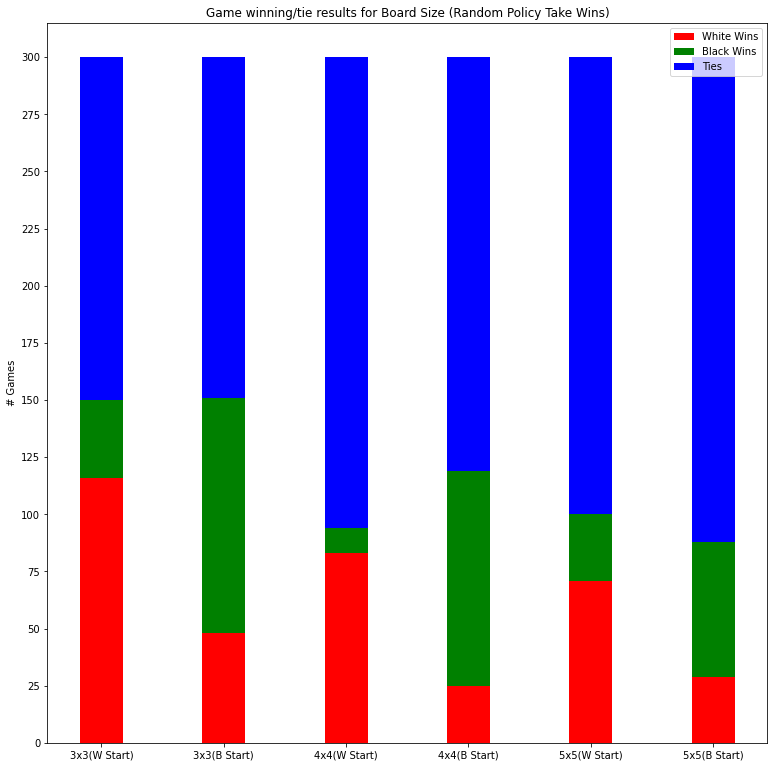

In [153]:
width = 0.35
ind = np.arange(6)
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, all_white_wins, width, color='r', label="White Wins")
ax.bar(ind, all_black_wins, width, bottom=all_white_wins, color='g', label="Black Wins")
ax.bar(ind, all_ties, width, bottom=all_white_wins+all_black_wins, color='b', label="Ties")
ax.set_ylabel('# Games')
ax.set_title('Game winning/tie results for Board Size (Random Policy Take Wins)')
ax.set_xticks(ind)
ax.set_xticklabels(['3x3(W Start)', '3x3(B Start)', '4x4(W Start)', '4x4(B Start)', '5x5(W Start)', '5x5(B Start)'])
ax.set_yticks(np.arange(0, 325, 25))
ax.legend()
plt.savefig("plot_random_policy_take_win_game_results.png", bbox_inches='tight')
plt.show()

### MCTS Results

In [154]:
df_mcts_vs_rand_runs = pd.read_csv(f"{path}/mcts_vs_randeff_run_3.csv")
df_mcts_vs_rand_runs = df_mcts_vs_rand_runs.drop("board_size", axis=1)
df_mcts_vs_rand_runs = df_mcts_vs_rand_runs.drop("mcts_expansion_depth", axis=1)
df_mcts_vs_rand_runs = df_mcts_vs_rand_runs.drop("mcts_iterations", axis=1)
df_mcts_vs_rand_runs

,mcts_expansion_epsilon,rollout_runs,trial_number,steps,reward_for_white_player,reward_for_black_player
0,0.9,1,0,16,0,0
1,0.9,1,1,10,0,0
2,0.9,1,2,14,0,10
3,0.9,1,3,13,10,0
4,0.9,1,4,17,10,0
...,...,...,...,...,...,...
595,1.0,32,95,12,0,0
596,1.0,32,96,12,0,0
597,1.0,32,97,17,10,0
598,1.0,32,98,10,0,0


In [155]:
df_mcts_vs_rand_runs_eps1 = df_mcts_vs_rand_runs[df_mcts_vs_rand_runs["mcts_expansion_epsilon"] == 1]
df_mcts_vs_rand_runs_eps1_rr01 = df_mcts_vs_rand_runs_eps1[df_mcts_vs_rand_runs_eps1["rollout_runs"] == 1]
df_mcts_vs_rand_runs_eps1_rr08 = df_mcts_vs_rand_runs_eps1[df_mcts_vs_rand_runs_eps1["rollout_runs"] == 8]
df_mcts_vs_rand_runs_eps1_rr32 = df_mcts_vs_rand_runs_eps1[df_mcts_vs_rand_runs_eps1["rollout_runs"] == 32]

In [156]:
df_mcts_vs_rand_runs_eps09 = df_mcts_vs_rand_runs[df_mcts_vs_rand_runs["mcts_expansion_epsilon"] == 0.9]
df_mcts_vs_rand_runs_eps09_rr01 = df_mcts_vs_rand_runs_eps09[df_mcts_vs_rand_runs_eps09["rollout_runs"] == 1]
df_mcts_vs_rand_runs_eps09_rr08 = df_mcts_vs_rand_runs_eps09[df_mcts_vs_rand_runs_eps09["rollout_runs"] == 8]
df_mcts_vs_rand_runs_eps09_rr32 = df_mcts_vs_rand_runs_eps09[df_mcts_vs_rand_runs_eps09["rollout_runs"] == 32]

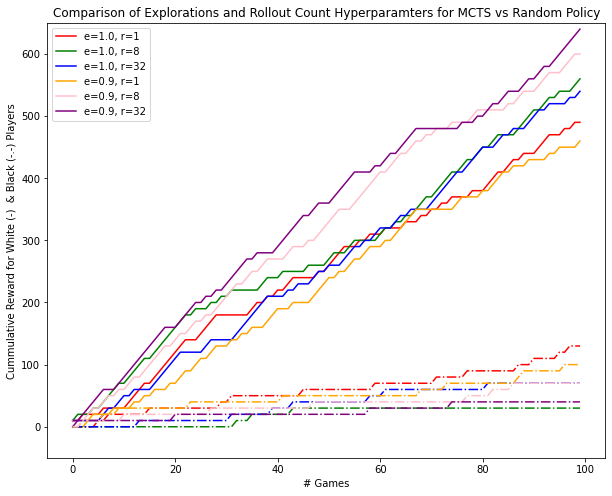

In [194]:
plt.figure(figsize=(10, 8))

x = np.arange(0, 100, 1)
y = np.cumsum(df_mcts_vs_rand_runs_eps1_rr01["reward_for_white_player"])
plt.plot(x, y, label="e=1.0, r=1", color="r")
y = np.cumsum(df_mcts_vs_rand_runs_eps1_rr08["reward_for_white_player"])
plt.plot(x, y, label="e=1.0, r=8", color="g")
y = np.cumsum(df_mcts_vs_rand_runs_eps1_rr32["reward_for_white_player"])
plt.plot(x, y, label="e=1.0, r=32", color="b")
y = np.cumsum(df_mcts_vs_rand_runs_eps09_rr01["reward_for_white_player"])
plt.plot(x, y, label="e=0.9, r=1", color="orange")
y = np.cumsum(df_mcts_vs_rand_runs_eps09_rr08["reward_for_white_player"])
plt.plot(x, y, label="e=0.9, r=8", color="pink")
y = np.cumsum(df_mcts_vs_rand_runs_eps09_rr32["reward_for_white_player"])
plt.plot(x, y, label="e=0.9, r=32", color="purple")

y = np.cumsum(df_mcts_vs_rand_runs_eps1_rr01["reward_for_black_player"])
plt.plot(x, y, linestyle="-.", color="r")
y = np.cumsum(df_mcts_vs_rand_runs_eps1_rr08["reward_for_black_player"])
plt.plot(x, y, linestyle="-.", color="g")
y = np.cumsum(df_mcts_vs_rand_runs_eps1_rr32["reward_for_black_player"])
plt.plot(x, y, linestyle="-.", color="b")
y = np.cumsum(df_mcts_vs_rand_runs_eps09_rr01["reward_for_black_player"])
plt.plot(x, y, linestyle="-.", color="orange")
y = np.cumsum(df_mcts_vs_rand_runs_eps09_rr08["reward_for_black_player"])
plt.plot(x, y, linestyle="-.", color="pink")
y = np.cumsum(df_mcts_vs_rand_runs_eps09_rr32["reward_for_black_player"])
plt.plot(x, y, linestyle="-.", color="purple")

plt.legend()
plt.xlabel("# Games")
plt.ylabel("Cummulative Reward for White (-)  & Black (-.-) Players")
plt.ylim([-50, 650])
plt.title("Comparison of Explorations and Rollout Count Hyperparamters for MCTS vs Random Policy")
plt.savefig("plot_mcts_vs_random.png", bbox_inches='tight')
plt.show()

In [127]:
mcts_vs_rand_eps09_rr01_white_wins = sum(df_mcts_vs_rand_runs_eps09_rr32["reward_for_white_player"] > 0)
mcts_vs_rand_eps09_rr01_black_wins = sum(df_mcts_vs_rand_runs_eps09_rr32["reward_for_black_player"] > 0)
mcts_vs_rand_eps09_rr01_ties = 10000 - mcts_vs_rand_eps09_rr01_white_wins - mcts_vs_rand_eps09_rr01_black_wins
print(mcts_vs_rand_eps09_rr01_white_wins, mcts_vs_rand_eps09_rr01_black_wins, mcts_vs_rand_eps09_rr01_ties)

64 4 9932


# MCTS vs MCTS

In [174]:
df_mcts_vs_mcts = pd.read_csv(f"{path}/mcts_with_sarsa_run2.csv")
df_mcts_vs_mcts = df_mcts_vs_mcts.drop("board_size", axis=1)
df_mcts_vs_mcts = df_mcts_vs_mcts.drop("mcts_expansion_depth", axis=1)
df_mcts_vs_mcts = df_mcts_vs_mcts.drop("mcts_expansion_epsilon", axis=1)
df_mcts_vs_mcts = df_mcts_vs_mcts.drop("mcts_iterations", axis=1)
df_mcts_vs_mcts = df_mcts_vs_mcts.drop("starting_player", axis=1)
df_mcts_vs_mcts = df_mcts_vs_mcts.drop("sarsa_epsilon", axis=1)
df_mcts_vs_mcts = df_mcts_vs_mcts.drop("sarsa_alpha", axis=1)
df_mcts_vs_mcts = df_mcts_vs_mcts.drop("sarsa_gamma", axis=1)
df_mcts_vs_mcts

,rollout_runs,rollout_policy,trial_number,steps,game_time,reward_for_white_player,reward_for_black_player
0,16,random,0,13,12583289000,10,0
1,16,random,1,14,11139635000,0,0
2,16,random,2,21,23072832000,10,0
3,16,random,3,17,20134742000,10,0
4,16,random,4,9,11216589000,10,0
5,16,random,5,18,14150515000,0,0
6,16,random,6,17,18254229000,10,0
7,16,random,7,9,10825787000,10,0
8,16,random,8,16,16846315000,0,0
9,16,random,9,19,23486675000,0,0


In [177]:
df_mcts_vs_mcts_rr16 = df_mcts_vs_mcts[df_mcts_vs_mcts["rollout_runs"] == 16]
df_mcts_vs_mcts_rr16 = df_mcts_vs_mcts_rr16.drop("rollout_runs", axis=1)
df_mcts_vs_mcts_rr32 = df_mcts_vs_mcts[df_mcts_vs_mcts["rollout_runs"] == 32]
df_mcts_vs_mcts_rr32 = df_mcts_vs_mcts_rr32.drop("rollout_runs", axis=1)

In [178]:
df_mcts_vs_mcts_rr16_rprandom = df_mcts_vs_mcts_rr16[df_mcts_vs_mcts_rr16["rollout_policy"] == "random"]
df_mcts_vs_mcts_rr16_rprandom = df_mcts_vs_mcts_rr16_rprandom.drop("rollout_policy", axis=1)
df_mcts_vs_mcts_rr16_rprandom

,trial_number,steps,game_time,reward_for_white_player,reward_for_black_player
0,0,13,12583289000,10,0
1,1,14,11139635000,0,0
2,2,21,23072832000,10,0
3,3,17,20134742000,10,0
4,4,9,11216589000,10,0
5,5,18,14150515000,0,0
6,6,17,18254229000,10,0
7,7,9,10825787000,10,0
8,8,16,16846315000,0,0
9,9,19,23486675000,0,0


In [179]:
df_mcts_vs_mcts_rr16_rprandwin = df_mcts_vs_mcts_rr16[df_mcts_vs_mcts_rr16["rollout_policy"] == "random_take_win"]
df_mcts_vs_mcts_rr16_rprandwin = df_mcts_vs_mcts_rr16_rprandwin.drop("rollout_policy", axis=1)
df_mcts_vs_mcts_rr16_rprandwin

,trial_number,steps,game_time,reward_for_white_player,reward_for_black_player
10,0,17,41177882000,10,0
11,1,19,46849572000,10,0
12,2,17,42901182000,10,0
13,3,21,39164173000,10,0
14,4,16,47357755000,0,0
15,5,25,71742577000,10,0
16,6,12,37225322000,0,0
17,7,11,35292678000,10,0
18,8,21,56895929000,10,0
19,9,16,39718096000,0,0


In [180]:
df_mcts_vs_mcts_rr16_rpsarsa = df_mcts_vs_mcts_rr16[df_mcts_vs_mcts_rr16["rollout_policy"] == "egreedy-sarsa"]
df_mcts_vs_mcts_rr16_rpsarsa = df_mcts_vs_mcts_rr16_rpsarsa.drop("rollout_policy", axis=1)
df_mcts_vs_mcts_rr16_rpsarsa

,trial_number,steps,game_time,reward_for_white_player,reward_for_black_player
20,0,18,73179495000,0,0
21,1,9,51067091000,10,0
22,2,11,48067066000,10,0
23,3,10,45279255000,0,0
24,4,15,69879619000,10,0
25,5,12,48146231000,0,0
26,6,12,48333283000,0,0
27,7,18,78781281000,0,0
28,8,9,33777619000,10,0
29,9,17,53114761000,10,0


In [182]:
df_mcts_vs_mcts_rr32_rprandom = df_mcts_vs_mcts_rr32[df_mcts_vs_mcts_rr32["rollout_policy"] == "random"]
df_mcts_vs_mcts_rr32_rprandom = df_mcts_vs_mcts_rr32_rprandom.drop("rollout_policy", axis=1)
df_mcts_vs_mcts_rr32_rprandom

,trial_number,steps,game_time,reward_for_white_player,reward_for_black_player
30,0,22,25937288000,0,0
31,1,10,18474125000,0,0
32,2,21,38094767000,10,0
33,3,15,28330028000,10,0
34,4,14,30463729000,0,0
35,5,9,19430632000,10,0
36,6,26,62657818000,0,0
37,7,11,29128576000,10,0
38,8,10,25312538000,0,0
39,9,14,36895302000,0,0


In [183]:
df_mcts_vs_mcts_rr32_rprandwin = df_mcts_vs_mcts_rr32[df_mcts_vs_mcts_rr32["rollout_policy"] == "random_take_win"]
df_mcts_vs_mcts_rr32_rprandwin = df_mcts_vs_mcts_rr32_rprandwin.drop("rollout_policy", axis=1)
df_mcts_vs_mcts_rr32_rprandwin

,trial_number,steps,game_time,reward_for_white_player,reward_for_black_player
40,0,25,67415319000,10,0
41,1,10,44916782000,0,0
42,2,19,81592531000,10,0
43,3,11,54126028000,10,0
44,4,11,45867299000,10,0
45,5,22,62841099000,0,0
46,6,17,73883877000,10,0
47,7,9,43109705000,10,0
48,8,12,49295654000,0,0
49,9,13,58026299000,0,0


In [186]:
df_mcts_vs_mcts_rr32_rpsarsa = df_mcts_vs_mcts_rr32[df_mcts_vs_mcts_rr32["rollout_policy"] == "egreedy-sarsa"]
df_mcts_vs_mcts_rr32_rpsarsa = df_mcts_vs_mcts_rr32_rpsarsa.drop("rollout_policy", axis=1)
df_mcts_vs_mcts_rr32_rpsarsa

,trial_number,steps,game_time,reward_for_white_player,reward_for_black_player
50,0,15,120614208000,10,0
51,1,13,108233280000,10,0
52,2,17,113230420000,10,0
53,3,13,111729817000,10,0
54,4,15,124607361000,10,0
55,5,15,135935629000,10,0
56,6,15,151243449000,10,0
57,7,12,112876691000,0,0
58,8,13,139590894000,10,0
59,9,12,123089539000,0,0


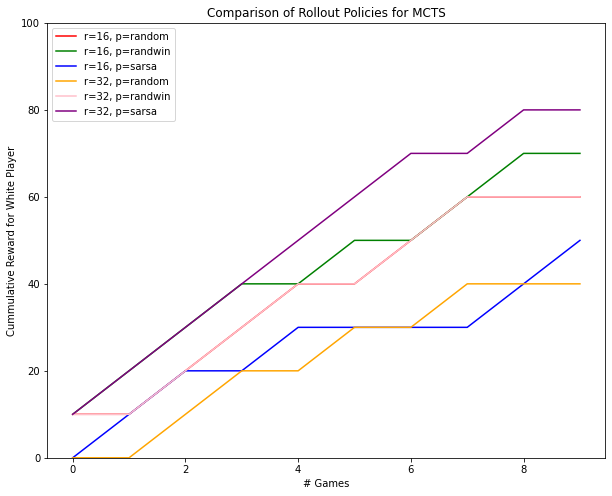

In [191]:
plt.figure(figsize=(10, 8))

x = np.arange(0, 10, 1)
y = np.cumsum(df_mcts_vs_mcts_rr16_rprandom["reward_for_white_player"])
plt.plot(x, y, label="r=16, p=random", color="r")
y = np.cumsum(df_mcts_vs_mcts_rr16_rprandwin["reward_for_white_player"])
plt.plot(x, y, label="r=16, p=randwin", color="g")
y = np.cumsum(df_mcts_vs_mcts_rr16_rpsarsa["reward_for_white_player"])
plt.plot(x, y, label="r=16, p=sarsa", color="b")
y = np.cumsum(df_mcts_vs_mcts_rr32_rprandom["reward_for_white_player"])
plt.plot(x, y, label="r=32, p=random", color="orange")
y = np.cumsum(df_mcts_vs_mcts_rr32_rprandwin["reward_for_white_player"])
plt.plot(x, y, label="r=32, p=randwin", color="pink")
y = np.cumsum(df_mcts_vs_mcts_rr32_rpsarsa["reward_for_white_player"])
plt.plot(x, y, label="r=32, p=sarsa", color="purple")

plt.legend() 
plt.xlabel("# Games")
plt.ylabel("Cummulative Reward for White Player")
plt.ylim([0, 100])
plt.title("Comparison of Rollout Policies for MCTS")
plt.savefig("plot_mcts_vs_mcts_rollout_policies_comp.png", bbox_inches='tight')
plt.show()

### Avg Time To select action on each Game

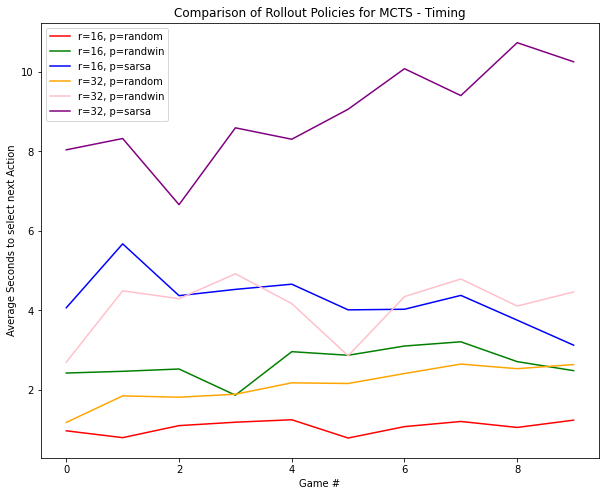

In [244]:
plt.figure(figsize=(10, 8))

conv_to_sec = 1e9

x = np.arange(0, 10, 1)
y = (df_mcts_vs_mcts_rr16_rprandom["game_time"] / df_mcts_vs_mcts_rr16_rprandom["steps"]) / conv_to_sec
plt.plot(x, y, label="r=16, p=random", color="r")
y = (df_mcts_vs_mcts_rr16_rprandwin["game_time"] / df_mcts_vs_mcts_rr16_rprandwin["steps"]) / conv_to_sec
plt.plot(x, y, label="r=16, p=randwin", color="g")
y = (df_mcts_vs_mcts_rr16_rpsarsa["game_time"] / df_mcts_vs_mcts_rr16_rpsarsa["steps"]) / conv_to_sec
plt.plot(x, y, label="r=16, p=sarsa", color="b")
y = (df_mcts_vs_mcts_rr32_rprandom["game_time"] / df_mcts_vs_mcts_rr32_rprandom["steps"]) / conv_to_sec
plt.plot(x, y, label="r=32, p=random", color="orange")
y = (df_mcts_vs_mcts_rr32_rprandwin["game_time"] / df_mcts_vs_mcts_rr32_rprandwin["steps"]) / conv_to_sec
plt.plot(x, y, label="r=32, p=randwin", color="pink")
y = (df_mcts_vs_mcts_rr32_rpsarsa["game_time"] / df_mcts_vs_mcts_rr32_rpsarsa["steps"]) / conv_to_sec
plt.plot(x, y, label="r=32, p=sarsa", color="purple")

plt.legend() 
plt.xlabel("Game #")
plt.ylabel("Average Seconds to select next Action")
plt.title("Comparison of Rollout Policies for MCTS - Timing")
plt.savefig("plot_mcts_vs_mcts_rollout_policies_timing_comp.png", bbox_inches='tight')
plt.show()

### MCTS vs RANDOM POLICY

In [195]:
df_mcts_vs_rand = pd.read_csv(f"{path}/mcts_with_sarsa_vs_mcts_rand_run2.csv")
df_mcts_vs_rand = df_mcts_vs_rand.drop("board_size", axis=1)
df_mcts_vs_rand = df_mcts_vs_rand.drop("mcts_expansion_depth", axis=1)
df_mcts_vs_rand = df_mcts_vs_rand.drop("mcts_expansion_epsilon", axis=1)
df_mcts_vs_rand = df_mcts_vs_rand.drop("mcts_iterations", axis=1)
df_mcts_vs_rand = df_mcts_vs_rand.drop("rollout_runs", axis=1)
df_mcts_vs_rand = df_mcts_vs_rand.drop("starting_player", axis=1)
df_mcts_vs_rand = df_mcts_vs_rand.drop("sarsa_epsilon", axis=1)
df_mcts_vs_rand = df_mcts_vs_rand.drop("sarsa_alpha", axis=1)
df_mcts_vs_rand = df_mcts_vs_rand.drop("sarsa_gamma", axis=1)
df_mcts_vs_rand

,trial_number,steps,reward_for_white_player,reward_for_black_player
0,0,16,0,0
1,1,17,0,0
2,2,15,0,0
3,3,15,0,0
4,4,20,0,0
5,5,16,0,0
6,6,14,0,0
7,7,18,0,0
8,8,39,10,0
9,9,13,10,0


In [202]:
ww = sum(df_mcts_vs_rand["reward_for_white_player"] > 0)
bw = sum(df_mcts_vs_rand["reward_for_black_player"] > 0)
print("WHITE WINS:", ww)
print("BLACK WINS:", bw)
print("TIES:", 50 - ww - bw)

WHITE WINS: 23
BLACK WINS: 0
TIES: 27


### SARSA POLICY ITERATION

In [209]:
df_sarsa_iter = pd.read_csv(f"{path}/sarsa_player_run_4.csv")
df_sarsa_iter = df_sarsa_iter.drop("board_size", axis=1)
df_sarsa_iter = df_sarsa_iter.drop("epsilon", axis=1)
df_sarsa_iter = df_sarsa_iter.drop("gamma", axis=1)
df_sarsa_iter = df_sarsa_iter.drop("alpha", axis=1)
df_sarsa_iter = df_sarsa_iter.drop("starting_player", axis=1)
df_sarsa_iter

,episode,trial_number,steps,reward_for_white_player,reward_for_black_player
0,0,0,18,0,10
1,1,0,11,0,0
2,2,0,12,0,0
3,3,0,11,0,0
4,4,0,12,0,10
...,...,...,...,...,...
44995,995,29,15,0,0
44996,996,29,27,0,0
44997,997,29,19,0,0
44998,998,29,28,0,10


In [211]:
rows_for_500_episode_trials = 500 * 30
df_sarsa_iter_500_episodes = df_sarsa_iter.iloc[0:rows_for_500_episode_trials]
df_sarsa_iter_500_episodes

,episode,trial_number,steps,reward_for_white_player,reward_for_black_player
0,0,0,18,0,10
1,1,0,11,0,0
2,2,0,12,0,0
3,3,0,11,0,0
4,4,0,12,0,10
...,...,...,...,...,...
14995,495,29,11,0,0
14996,496,29,28,0,10
14997,497,29,17,10,0
14998,498,29,17,0,0


In [218]:
df_sarsa_iter_500_episodes_trials = [
    df_sarsa_iter_500_episodes[df_sarsa_iter_500_episodes["trial_number"] == i].drop("trial_number", axis=1)
    for i in range(30)
]
df_sarsa_iter_500_episodes_trials[0]

,episode,steps,reward_for_white_player,reward_for_black_player
0,0,18,0,10
1,1,11,0,0
2,2,12,0,0
3,3,11,0,0
4,4,12,0,10
...,...,...,...,...
495,495,13,10,0
496,496,15,10,0
497,497,32,0,10
498,498,13,10,0


In [213]:
df_sarsa_iter_1000_episodes = df_sarsa_iter.iloc[rows_for_500_episode_trials:]
df_sarsa_iter_1000_episodes

,episode,trial_number,steps,reward_for_white_player,reward_for_black_player
15000,0,0,24,0,0
15001,1,0,28,0,10
15002,2,0,15,10,0
15003,3,0,18,0,10
15004,4,0,14,0,0
...,...,...,...,...,...
44995,995,29,15,0,0
44996,996,29,27,0,0
44997,997,29,19,0,0
44998,998,29,28,0,10


In [219]:
df_sarsa_iter_1000_episodes = [
    df_sarsa_iter_1000_episodes[df_sarsa_iter_1000_episodes["trial_number"] == i].drop("trial_number", axis=1)
    for i in range(30)
]
df_sarsa_iter_1000_episodes[0]

,episode,steps,reward_for_white_player,reward_for_black_player
15000,0,24,0,0
15001,1,28,0,10
15002,2,15,10,0
15003,3,18,0,10
15004,4,14,0,0
...,...,...,...,...
15995,995,17,10,0
15996,996,44,0,10
15997,997,18,0,0
15998,998,18,0,0


In [222]:
rewards_per_episode_1000_episodes = np.array([df_sarsa_iter_1000_episodes[i]["reward_for_white_player"] for i in range(30)])
rewards_per_episode_1000_episodes.shape

(30, 1000)

In [226]:
mean = np.mean(rewards_per_episode_1000_episodes, axis=0)
std = np.std(rewards_per_episode_1000_episodes, axis=0)
mean.shape, std.shape

((1000,), (1000,))

<Figure size 432x288 with 0 Axes>

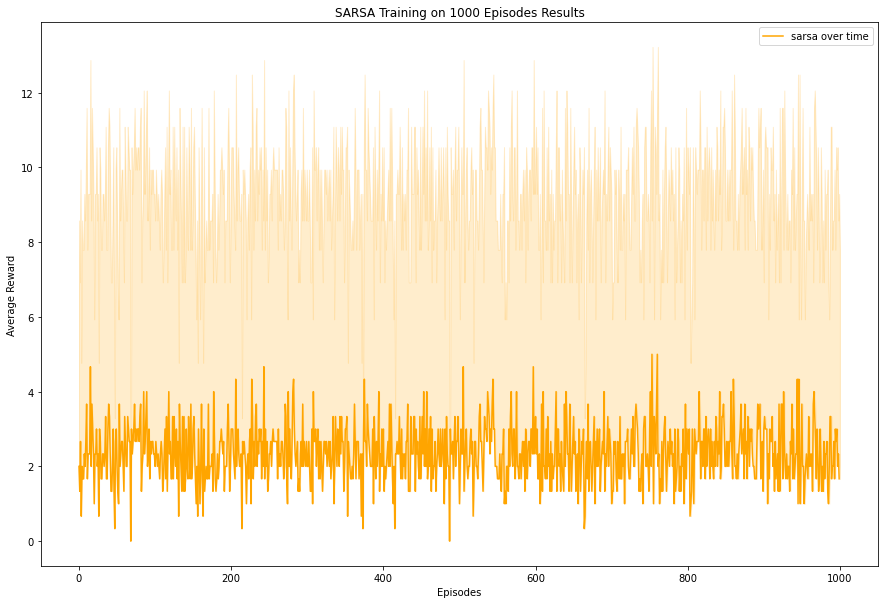

In [239]:
plt.tight_layout()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

num_episodes = 1000

x = np.linspace(0, num_episodes, num_episodes)
conf_value = 1.645  # 90%

ax.plot(mean, label="sarsa over time", color="orange")
ax.fill_between(x,
                mean,
                mean + conf_value * std,
                color="orange", alpha=0.2)

ax.legend()
ax.set_title("SARSA Training on 1000 Episodes Results")
ax.set_xlabel("Episodes")
ax.set_ylabel("Average Reward")

plt.savefig("sarsa_training_1000_episodes.png")
plt.show()